# used dataframes and graphs (recycle bin)

# Importing python packages 

In [ ]:
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import datetime
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
import os
import sys

# Data Analysis
import pandas as pd

# Cassandra
from connection_manager import cassandraConnect
from cassandra.query import dict_factory

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
import tqdm as tqdm
from tabulate import tabulate


# Importing the dataset - df = 20240603

In [ ]:
PORT = 9042
KEYSPACE = "cncity_server"
TABLE = "all_data"

# Source DB
CONTACT_POINTS = ["39.118.41.24"]
USERNAME = "cnscada"
PW = "cnscada123!@#"

cc = cassandraConnect(CONTACT_POINTS, USERNAME, PW)
cc.session.row_factory = dict_factory

Connected to Cassandra Successfully: ['39.118.41.24'] 9042


In [ ]:
use_machine_code = 1
use_day = 20240603
# save_path = os.path.join('.', 'data', f'Machine{use_machine_code}_{use_day}.csv')

###################################

query = """
    SELECT *
    FROM {keyspace_name}.{table_name}
    WHERE machine_code = {query_machine_code}
    AND day = {query_day}
""".format(
    keyspace_name = KEYSPACE,
    table_name = TABLE,
    query_machine_code = use_machine_code,
    query_day = use_day
)

query_result = cc.session.execute(query)
###################################

# Pandas DataFrame으로 전환
df_1 = pd.DataFrame(list(query_result)).sort_values(by='time')
# df.to_csv(save_path, index=False)

print(df_1.shape)
df_1.head()

(86261, 22)


,machine_code,day,time,door_open,electricity_1,electricity_2,gas_leak,is_maintenance,machine_type,network_status,...,power_on,pressure_1,pressure_2,ssv1,ssv2,status_electricity_1,status_electricity_2,status_pressure_1,status_pressure_2,weektime
86260,1,20240603,0,0,-1385.0,0.0,0,0,1,0,...,0,0.798,2.130,0,0,0,0,0,0,0
86259,1,20240603,1,0,-1385.0,0.0,0,0,1,0,...,0,0.798,2.130,0,0,0,0,0,0,0
86258,1,20240603,2,0,-1385.0,0.0,0,0,1,0,...,0,0.798,2.130,0,0,0,0,0,0,0
86257,1,20240603,3,0,-1385.0,0.0,0,0,1,0,...,0,0.798,2.144,0,0,0,0,0,0,0
86256,1,20240603,4,0,-1385.0,0.0,0,0,1,0,...,0,0.798,2.144,0,0,0,0,0,0,0


# Visualization - plotted each variable (df)

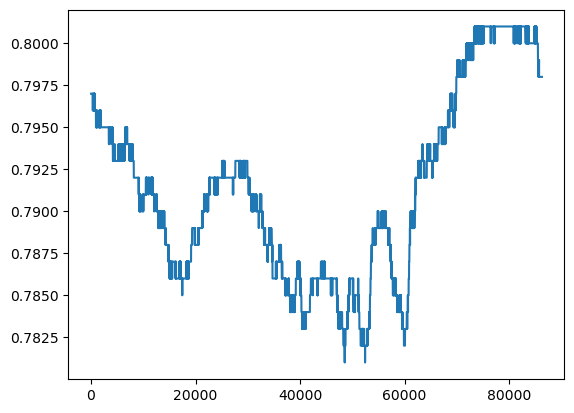

In [ ]:
plt.plot(df_1['pressure_1'])

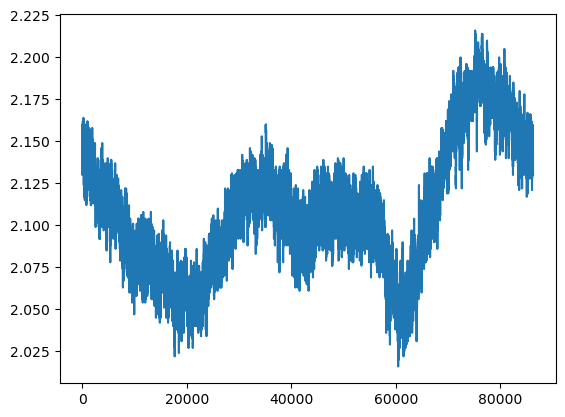

In [ ]:
plt.plot(df_1['pressure_2'])

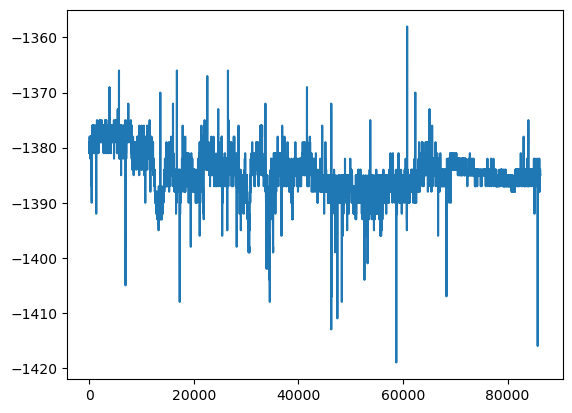

In [ ]:
plt.plot(df_1['electricity_1'])

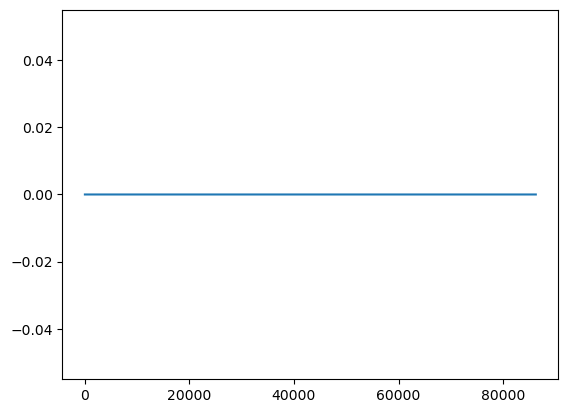

In [ ]:
plt.plot(df_1['electricity_2'])

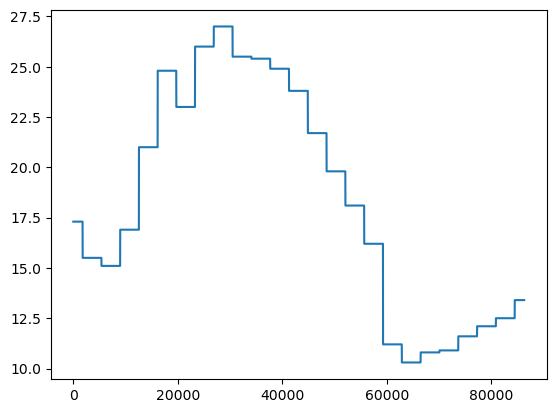

In [ ]:
plt.plot(df_1['outside_temperature'])

# Linear Regression Plots (df)

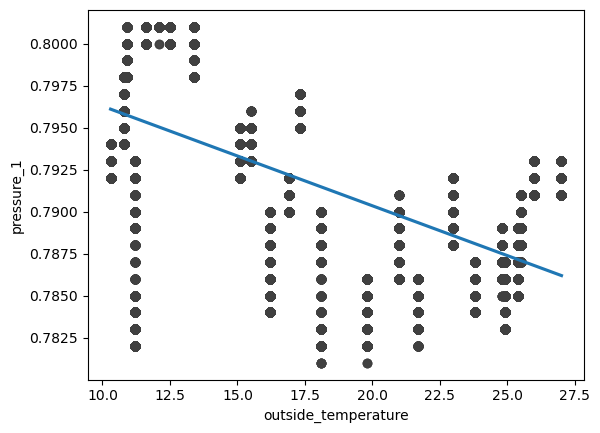

In [ ]:
# linear regression with outside_temperature and pressure_1
ax = sns.regplot(x='outside_temperature', y= 'pressure_1', data=df_1, ci=None, scatter_kws=dict(color='0.25'))

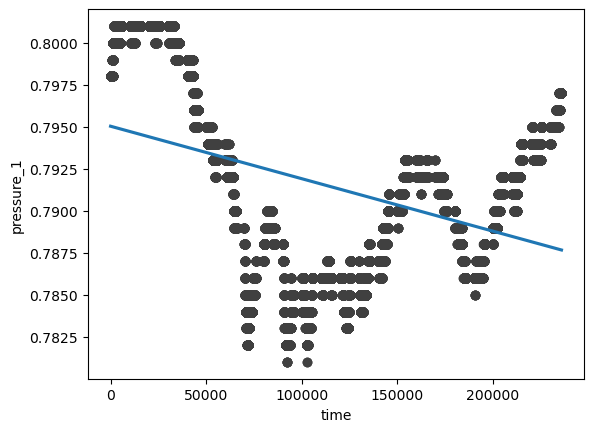

In [ ]:
# linear regression with time and pressure_1
ax = sns.regplot(x='time',y='pressure_1',data=df_1,ci = None, scatter_kws = dict(color = '0.25'))

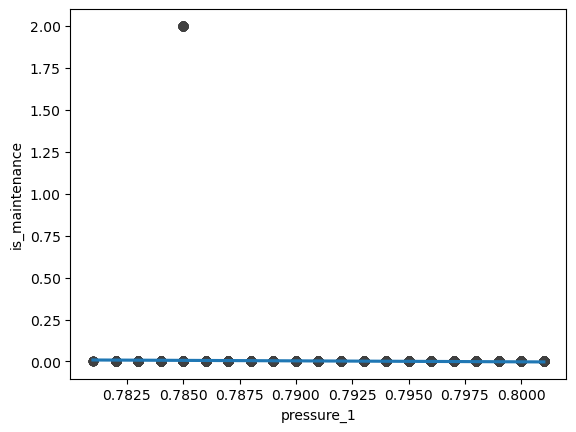

In [ ]:
# linear regression with pressure_1 and is_maintenance (doesn't provide us with that much insight)
ax = sns.regplot(x = 'pressure_1', y='is_maintenance',data= df_1,ci = None, scatter_kws = dict(color = '0.25'))

# Linear regression (using the python package), df

In [ ]:
model_gas_and_temp = LinearRegression()

In [ ]:
# transforms the columns into numpy arrays
pressure_1_array = np.array(df_1['pressure_1']).reshape(-1,1)
temperature_array= np.array(df_1['outside_temperature']).reshape(-1,1)

In [ ]:
# splits the arrays into train and test sets
temp_train, temp_test, pressure_train, pressure_test = train_test_split(temperature_array, pressure_1_array, random_state=104, test_size=0.25, shuffle=True )

In [ ]:
# trains the model
model_gas_and_temp.fit(temp_train, pressure_train)

LinearRegression()

In [ ]:
# uses the model to predict 'pressure_1' values
predicted_pressure = model_gas_and_temp.predict(temp_test)

In [ ]:
# gives us the slope and intercept of the linear regression model
a = float(model_gas_and_temp.coef_)
b = float(model_gas_and_temp.intercept_)
print(f'y = {a:.7f}x + {b:3f}')

y = -0.0005971x + 0.802281


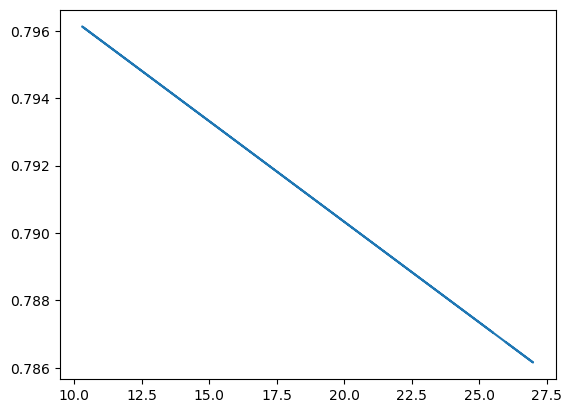

In [ ]:
plt.plot(temp_test,predicted_pressure)
plt.xlabel = 'temperature'
plt.ylabel = 'pressure_1'

# Linear regression - now with electricity_1 and pressure_1 (df)

In [ ]:
model_electricity_pressure = LinearRegression()

In [ ]:
# takes the columns and turns them into numpy arrays
electricity_1_array = np.array(df_1['electricity_1']).reshape(-1,1)
pressure_2_array = np.array(df_1['pressure_1']).reshape(-1,1)

In [ ]:
# splits the arrays into train and test sets
electricity_train, electricity_test, pressure_train, pressure_test = train_test_split(electricity_1_array, pressure_2_array,random_state=104, test_size=0.25, shuffle=True)

In [ ]:
# trains the model
model_electricity_pressure.fit(electricity_train, pressure_train)

LinearRegression()

In [ ]:
# uses the model to predict pressure_1
y_pred_pressure = model_electricity_pressure.predict(electricity_test)

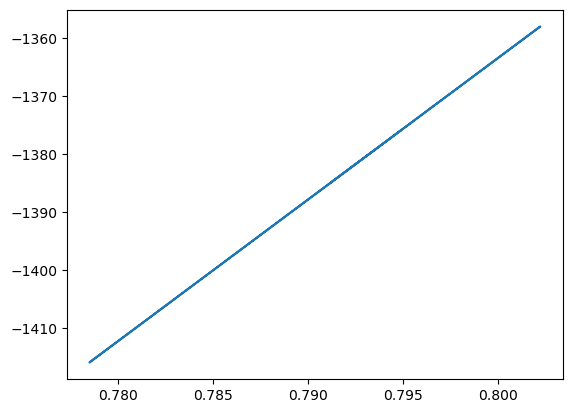

In [ ]:
plt.plot(y_pred_pressure, electricity_test)

# Logistic Regression with pressure_1 and is_maintenance (df)

In [ ]:
model_log = LogisticRegression()

In [ ]:
# creates numpy arrays using the columns in our dataframe
maintenance_array = np.array(df_1['is_maintenance']).reshape(-1,1)
time_array = np.array(df_1['time']).reshape(-1,1)
pressure_array = np.array(df_1['pressure_1']).reshape(-1,1)

In [ ]:
# splits them into train and test sets
X_train, X_test, y_train, y_test = train_test_split(pressure_array,maintenance_array,random_state=104,test_size=0.25,shuffle=True) 

In [ ]:
# trains the model
model_log.fit(X_train, y_train)

/Users/annikaseo-yeonkim/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
# uses that to predict is_maintenance
y_pred_log = model_log.predict(X_test)

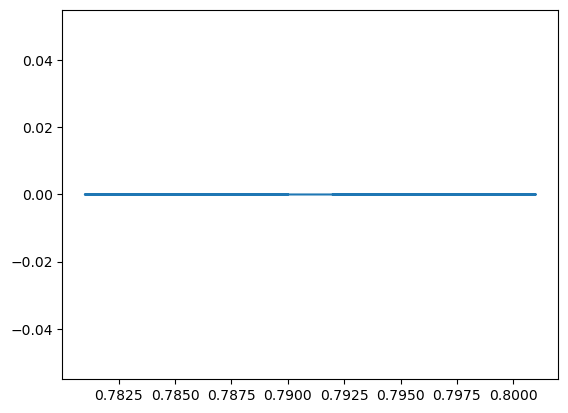

In [ ]:
plt.plot(X_test, y_pred_log)

# Autoregression using lag plot (df)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

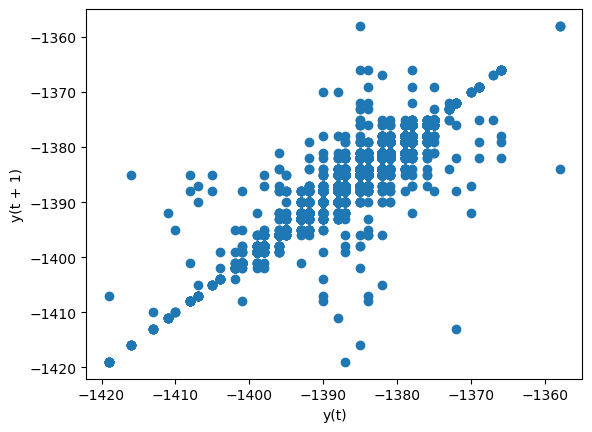

In [ ]:
pd.plotting.lag_plot(df_1['electricity_1'],lag=1)

# Autocorrelation plots (df)

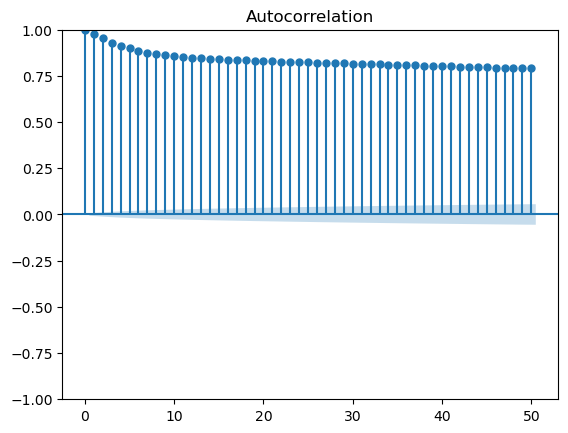

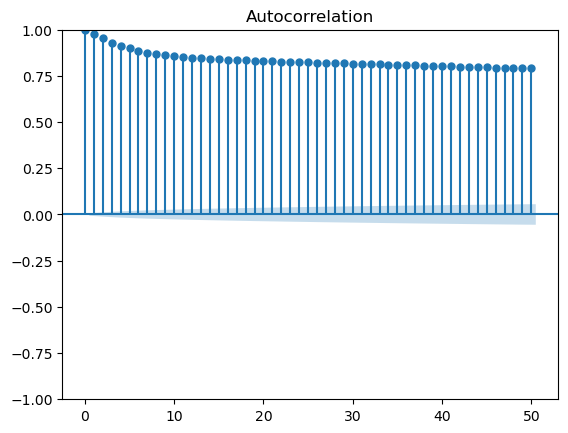

In [ ]:
plot_acf(df_1['electricity_1'])

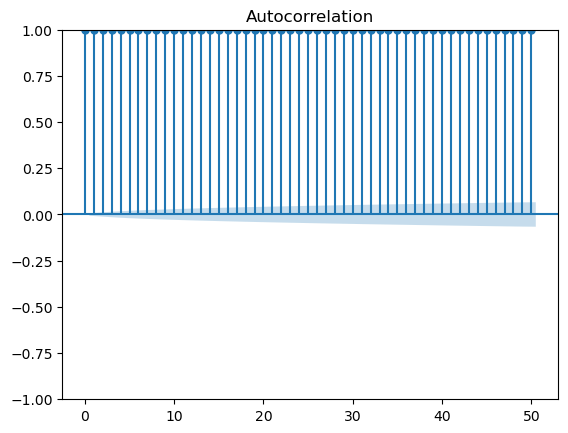

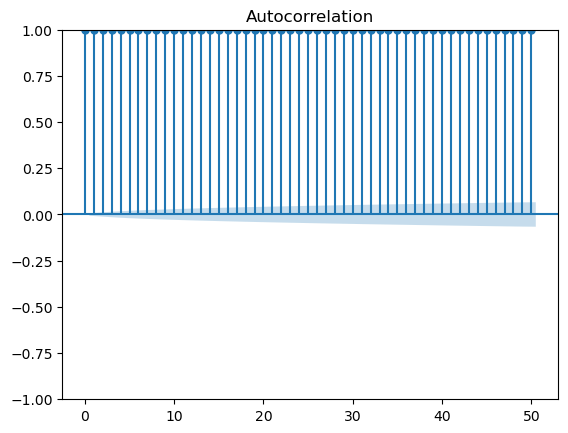

In [ ]:
# log transformation - does nothing
log_pressure = np.log(df_1['pressure_1'])
plot_acf(log_pressure)

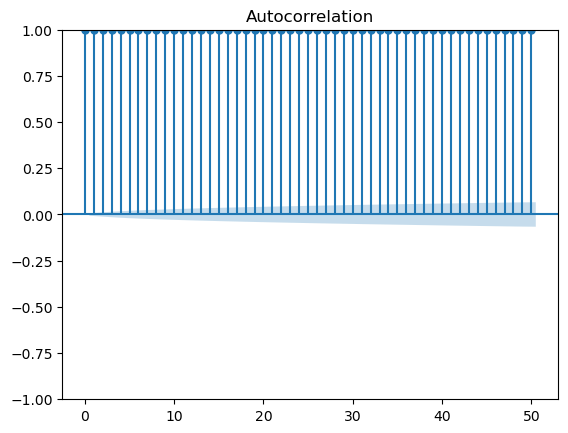

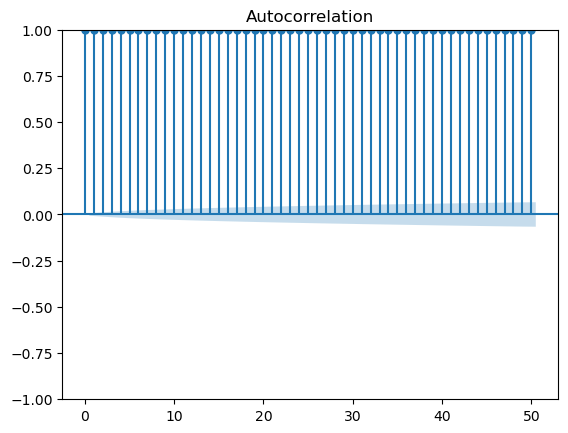

In [ ]:
plot_acf(df_1['pressure_1'])

In [ ]:
rolling_average = df.electricity_1.rolling(1000).mean() # window = 1000

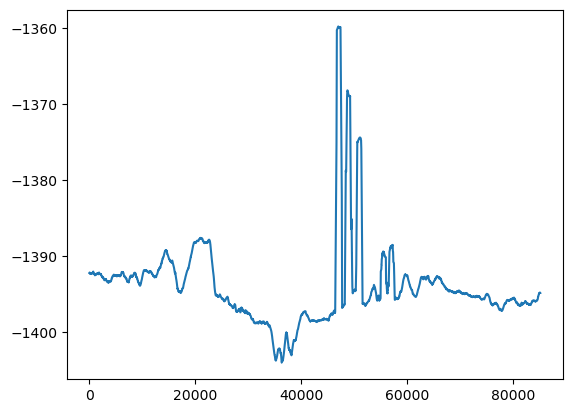

In [ ]:
plt.plot(rolling_average)

In [ ]:
rolling_average_2 = df_1.electricity_1.rolling(10000).mean() # window = 10000

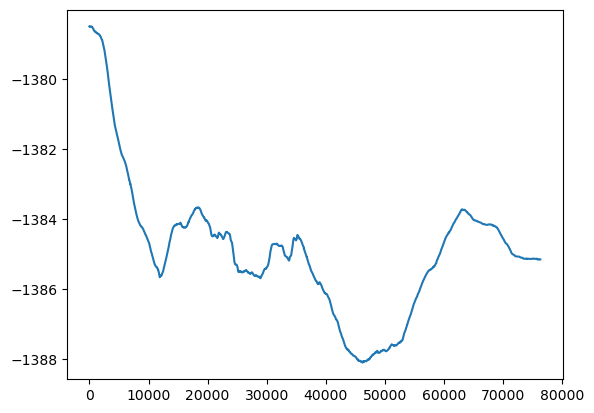

In [ ]:
plt.plot(rolling_average_2)

<b> #2. pressure_1 </b>

In [ ]:
rolling_average_pressure = df_1.pressure_1.rolling(1000).mean()

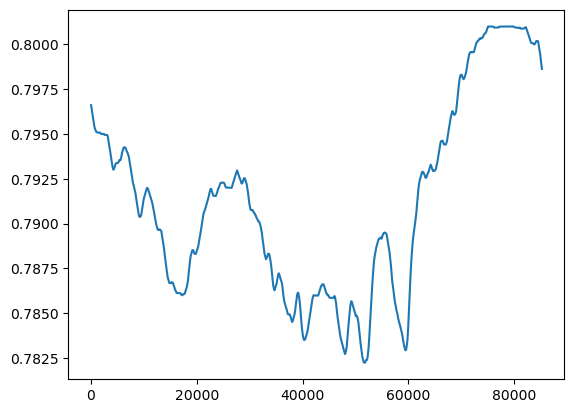

In [ ]:
plt.plot(rolling_average_pressure)

In [ ]:
rolling_average_pressure_1 = df_1.pressure_1.rolling(10000).mean()

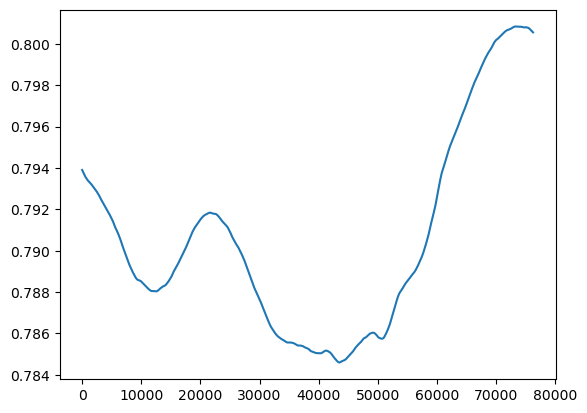

In [ ]:
plt.plot(rolling_average_pressure_1)

In [ ]:
rolling_average_electricity_2 = df_1.electricity_2.rolling(1000).mean()

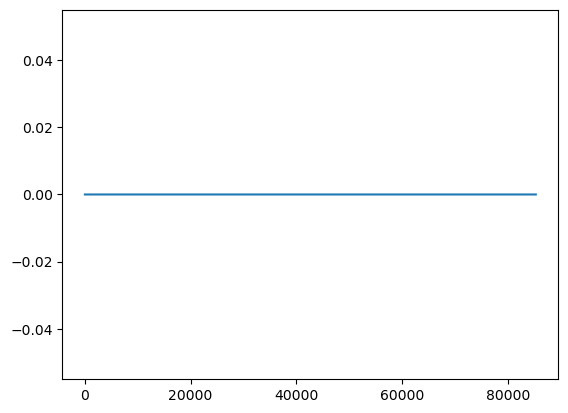

In [ ]:
plt.plot(rolling_average_electricity_2)

# process_dataframe and query

In [ ]:
processed_dataframe_list = []
day_to_query = [20240603,20240604,20240605,20240606,20240607,20240608,20240609]
# df = query(20240603,1)
# df.columns
for day in day_to_query:
    df = query(day,1)
    new_df = process_dataframe(df,'max')
    processed_dataframe_list.append(new_df)
del df
del new_df
final_df = pd.concat(processed_dataframe_list, axis = 1)

# final_df.head()

# final_df.T.shape

# final_df['Hour']

# concatenated the dataframes - 20240603 ~ 20240609

In [ ]:
processed_dataframe_list = []
day_to_query = [20240603,20240604,20240605,20240606,20240607,20240608,20240609]
# df = query(20240603,1)
# df.columns
for day in day_to_query:
    df = query(day,1)
    new_df = process_dataframe(df,'max')
    processed_dataframe_list.append(new_df)
del df
del new_df
final_df = pd.concat(processed_dataframe_list, axis = 1)

# final_df.T.shape

# final_df['Hour']

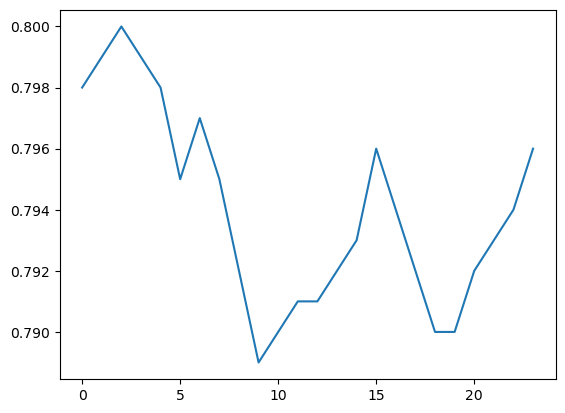

In [ ]:
df_1 = query(20240603,1)
df_2 = query(20240606,1)

df_1 = process_dataframe(df_1,'max')
df_2 = process_dataframe(df_2,'max')

# plt.plot(df_1['electricity_1'])
plt.plot(df_2['pressure_1'])

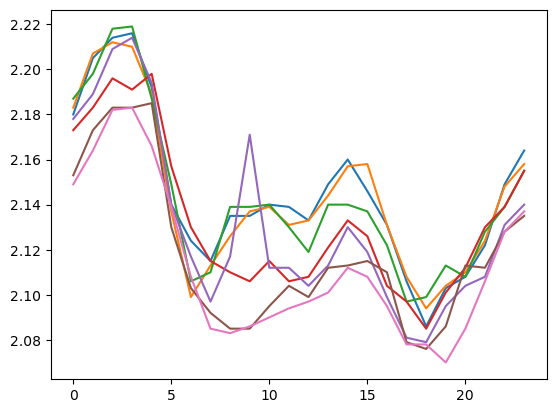

In [ ]:
plt.plot(final_df['pressure_2'])

In [ ]:
model_adjusted = LinearRegression()

In [ ]:
electricity_new_array = np.array(final_df['electricity_1'])
outside_new_array = np.array(final_df['outside_temperature'])

In [ ]:
electricity_new_train, electricity_new_test, outside_new_train, outside_new_test = train_test_split(electricity_new_array,outside_new_array,random_state = 42)

In [ ]:
model_adjusted.fit(outside_new_train,electricity_new_train)

LinearRegression()

In [ ]:
predicted_electricity = model_adjusted.predict(outside_new_test)

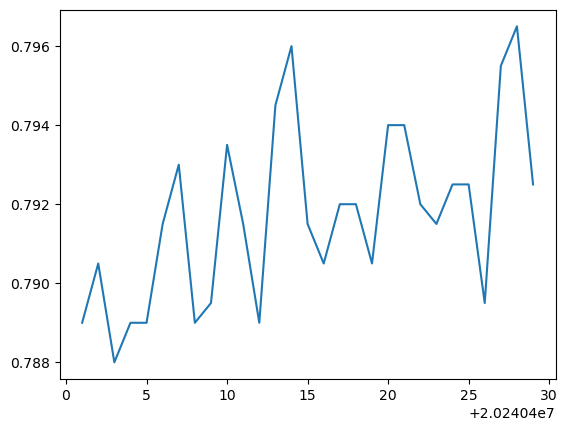

In [ ]:
plt.plot(day_list,final_df_2['pressure_1'].median())

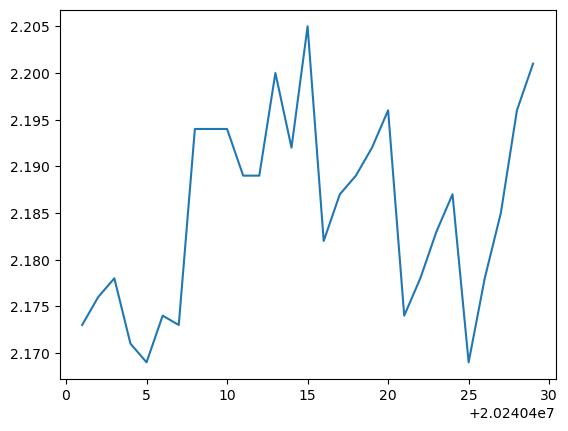

In [ ]:
plt.plot(day_list, final_df_2['pressure_2'].max())

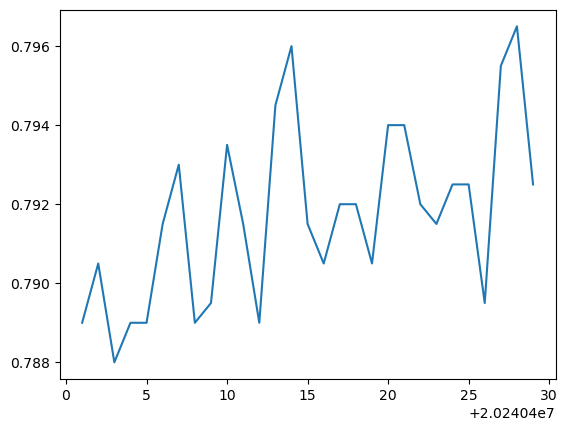

In [ ]:
plt.plot(day_list, final_df_2['pressure_1'].median())

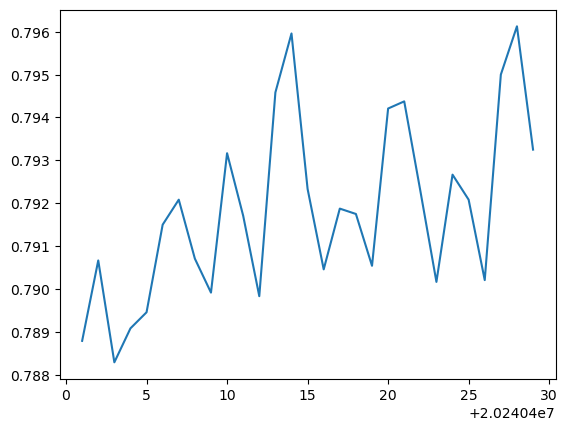

In [ ]:
plt.plot(day_list, final_df_2['pressure_1'].mean())

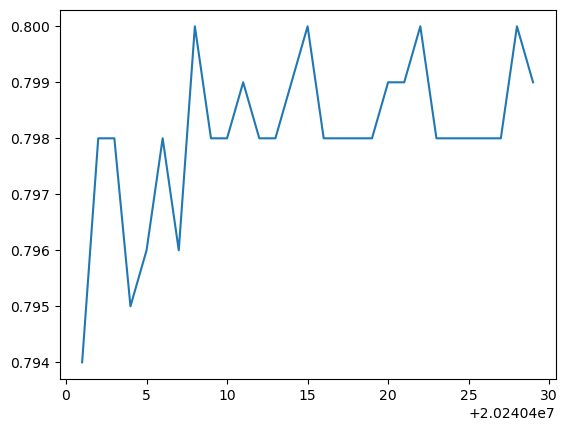

In [ ]:
plt.plot(day_list, final_df_2['pressure_1'].max())

# final_df_22 (April) final_df_33 (February)

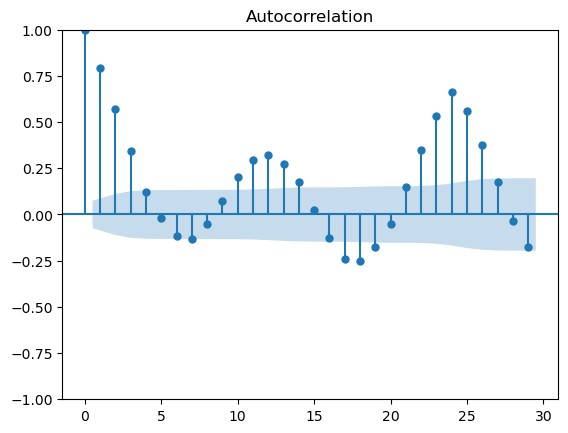

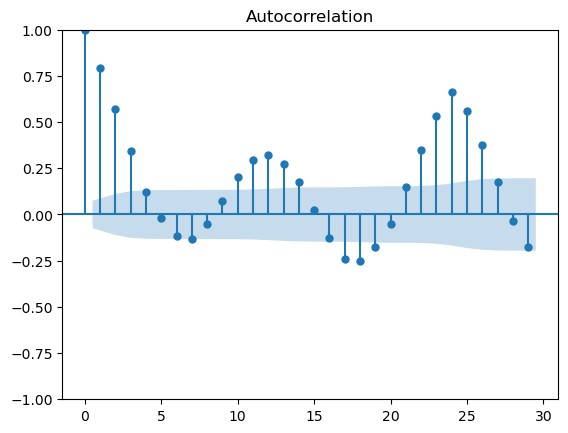

In [ ]:
fig_new = make_subplots(rows = 1, cols = 2)
plot_acf(final_df_22['pressure_1'])

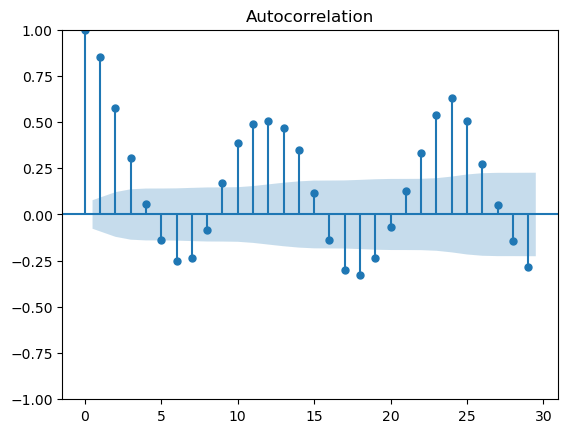

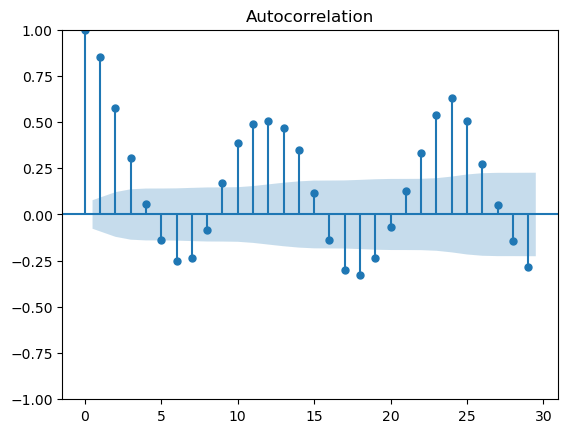

In [ ]:
plot_acf(final_df_33['pressure_1'])

In [ ]:
# processed_dataframe_list_4 = []
# start_date = 20240301

# while start_date < 20240331:
#     df_2 = query(start_date, 1)
#     new_df_2 = process_dataframe(df_2, 'max')
#     processed_dataframe_list_4.append(new_df_2)
#     start_date+=1

# del df_2
# del new_df_2

# final_df_mar = pd.concat(processed_dataframe_list_4, axis =0)

# final_df_mar.head()

In [ ]:
master_list_2 = []
master_list_2.append(final_df_33.copy())
master_list_2.append(final_df_22.copy())

In [ ]:
big_df = pd.concat(master_list_2, axis = 0)

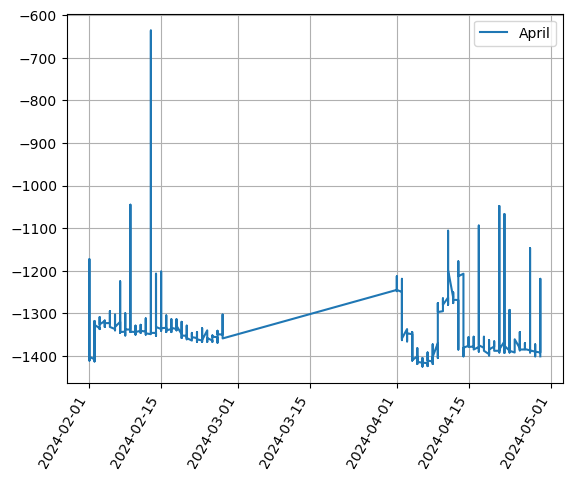

In [ ]:
plot_kmeans_results(big_df['day'],big_df['electricity_1'])

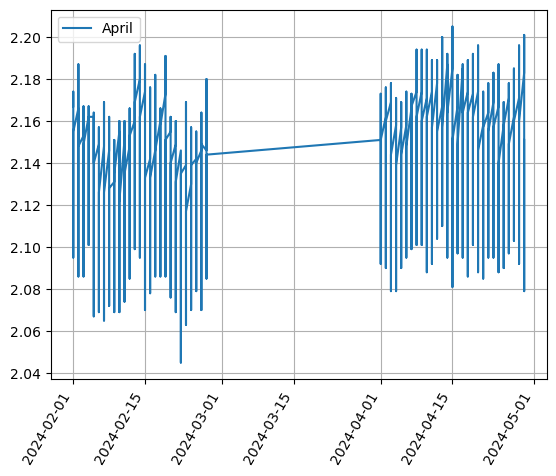

In [ ]:
plot_kmeans_results(big_df['day'],big_df['pressure_2'])

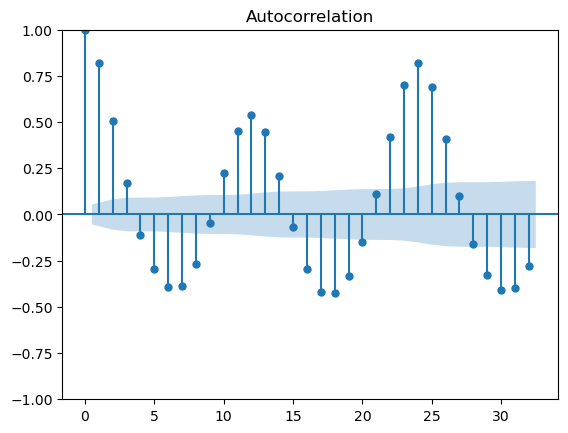

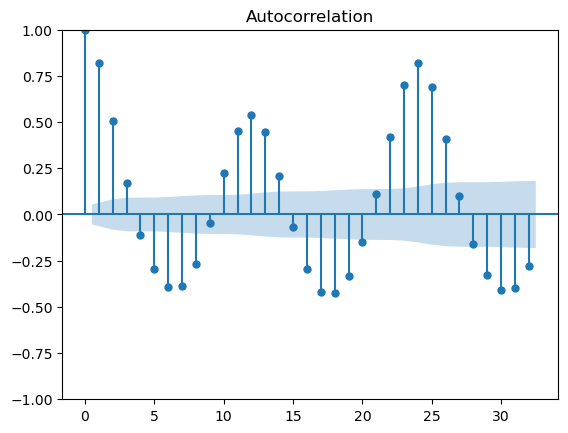

In [ ]:
plot_acf(big_df['pressure_2'])

In [ ]:
df_2 = query(20240301, 1)
new_df_2 = process_dataframe(df_2, 'max')
day_list_3 = list(new_df_2['day'])
new_date_list_3 = []
for item in day_list_3:
    day_string = str(item)
    day_datetime = datetime.strptime(day_string, '%Y%m%d')
    new_date_list_3.append(day_datetime)

new_df_2['day'] = new_date_list_3

new_df_2


,Hour,machine_code,day,door_open,electricity_1,electricity_2,gas_leak,is_maintenance,machine_type,network_status,...,power_on,pressure_1,pressure_2,ssv1,ssv2,status_electricity_1,status_electricity_2,status_pressure_1,status_pressure_2,weektime
0,0,1,2024-03-01,0,-1329.0,0.0,0,0,1,0,...,0,0.780,2.133,0,0,0,0,0,0,2
1,1,1,2024-03-01,0,-1344.0,0.0,0,0,1,0,...,0,0.783,2.135,0,0,0,0,0,0,2
2,2,1,2024-03-01,0,-1341.0,0.0,0,0,1,0,...,0,0.783,2.144,0,0,0,0,0,0,2
3,3,1,2024-03-01,0,-1347.0,0.0,0,0,1,0,...,0,0.781,2.130,0,0,0,0,0,0,2
4,4,1,2024-03-01,0,-1361.0,0.0,0,0,1,0,...,0,0.771,2.117,0,0,0,0,0,0,2
5,5,1,2024-03-01,0,-1361.0,0.0,0,0,1,0,...,0,0.774,2.106,0,0,0,0,0,0,2
6,6,1,2024-03-01,0,-1367.0,0.0,0,0,1,0,...,0,0.774,2.072,0,0,0,0,0,0,2
7,7,1,2024-03-01,0,-1369.0,0.0,0,0,1,0,...,0,0.771,2.065,0,0,0,0,0,0,2
8,8,1,2024-03-01,0,-1364.0,0.0,0,0,1,0,...,0,0.765,2.094,0,0,0,0,0,0,2
9,9,1,2024-03-01,0,-1359.0,0.0,0,0,1,0,...,0,0.763,2.121,0,0,0,0,0,0,2


In [ ]:
processed_dataframe_list_4 = []
start_date = 20240301

while start_date < 20240330:
    df_2 = query(start_date, 1)
    new_df_2 = process_dataframe(df_2, 'max')
    processed_dataframe_list_4.append(new_df_2)
    start_date+=1

del df_2
del new_df_2

final_df_mar = pd.concat(processed_dataframe_list_4, axis =0)

final_df_mar.head()

KeyError: 'time'

# pressure_1: visualization, analysis, etc - gibberish

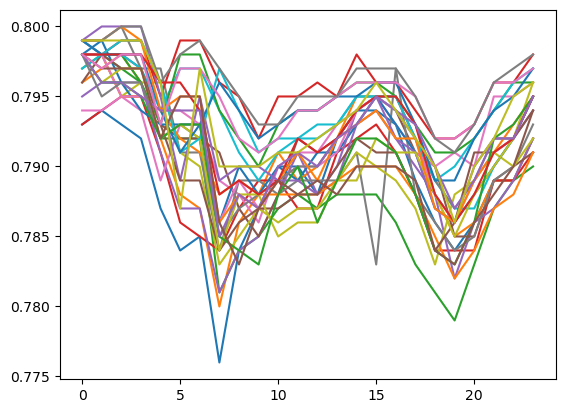

In [ ]:
# visualization
plt.plot(final_df_2['pressure_1'])

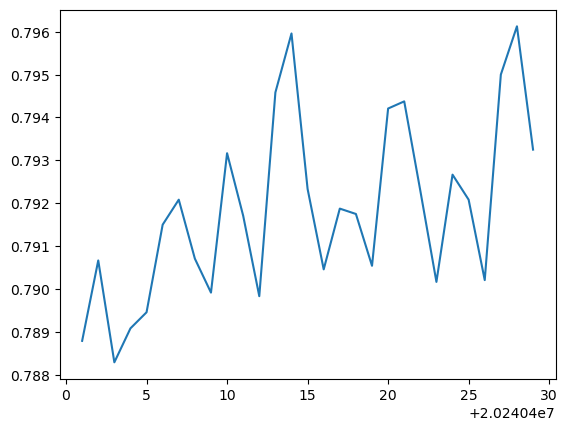

In [ ]:
plt.plot(day_list, final_df_2['pressure_1'].mean())

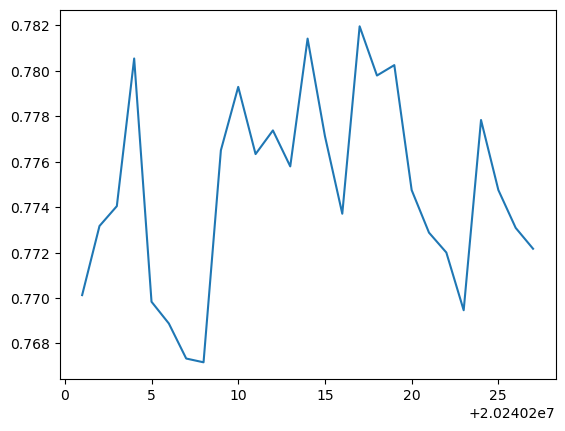

In [ ]:
plt.plot(day_list_2, final_df_3['pressure_1'].mean())

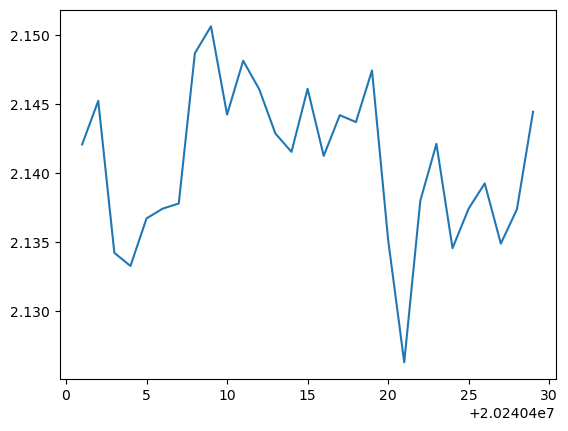

In [ ]:
plt.plot(day_list, final_df_2['pressure_2'].mean())

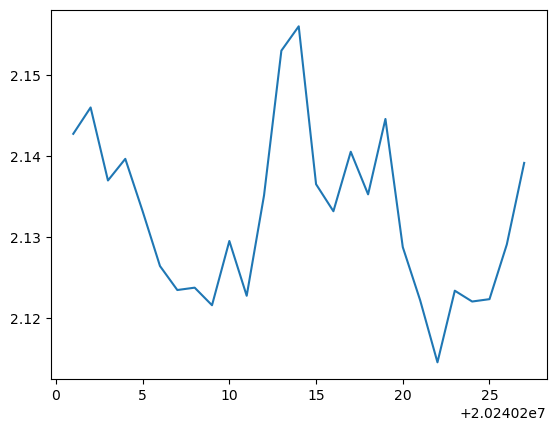

In [ ]:
plt.plot(day_list_2, final_df_3['pressure_2'].mean())

# Linear Regression using our new dataframe

In [ ]:
model_new = LinearRegression()

In [ ]:
processed_dataframe_list = []
day_to_query = [20240603,20240604,20240605,20240606,20240607,20240608,20240609]
# df = query(20240603,1)
# df.columns
for day in day_to_query:
    df = query(day,1)
    new_df = process_dataframe(df,'max')
    processed_dataframe_list.append(new_df)
del df
del new_df
final_df = pd.concat(processed_dataframe_list, axis = 1)

# final_df.T.shape

# final_df['Hour']

In [ ]:
# takes the columns and turns them into numpy arrays
electricity_1_array = np.array(final_df_2['pressure_1']).reshape(-1,1)
maintenance_array_new = np.array(final_df_2['is_maintenance']).reshape(-1,1)

In [ ]:
# splits the arrays into train and test sets
electricity_train, electricity_test, maintenance_train, maintenance_test = train_test_split(electricity_1_array, maintenance_array_new,random_state=104, test_size=0.25, shuffle=True)

In [ ]:
# trains the model
model_electricity_pressure.fit(electricity_train, maintenance_train)

LinearRegression()

In [ ]:
# uses the model to predict pressure_1
y_pred_maintenance = model_electricity_pressure.predict(electricity_test)

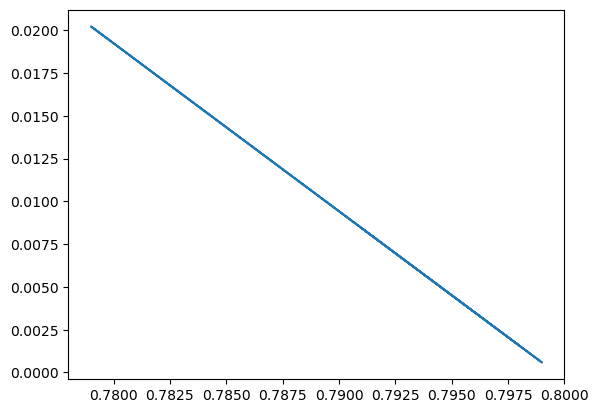

In [ ]:
plt.plot(electricity_test, y_pred_maintenance)